<a href="https://colab.research.google.com/github/Alfikriangelo/MachineLearningTasks/blob/main/5thWeekTask/Dendograms%26HierarchicalClustering_clusteringweek06%20dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Dendrograms




In [5]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist, squareform

plt.rcParams['figure.figsize'] = [9, 5]
sns.set_theme()

### Denrograms - clusteringweek6.csv


In [6]:
# Load dataset from CSV
data_df = pd.read_csv('sample_data/clusteringweek06.csv')

# Check the dataset structure
print(data_df.head())

# Subset dataset to two columns for easier
# visual inspection
numer_cols = ['x1', 'x2']

# Drop duplicates that have appeared
# due to removing columns
data_df_sub = data_df.filter(items=numer_cols + ['label'])

# Reduce dataset for easier dendrogram preview
data_df_sub = data_df_sub.sample(6, random_state=44)

    x1        x2        x3        x4        x5        x6        x7        x8  \
0  1.0  0.152936 -0.105586  0.200722  0.317201  0.260764  0.100945 -0.150063   
1  1.0  0.171534 -0.098975  0.268425  0.338672  0.268353  0.060835 -0.222475   
2  1.0  0.152317 -0.082973  0.287128  0.276014  0.189867  0.008714 -0.242234   
3  1.0  0.224392  0.118985  0.329432  0.372088  0.361005  0.015501 -0.194347   
4  1.0  0.087817 -0.068345  0.306967  0.330923  0.249144  0.006884 -0.265423   

         x9       x10  ...       x13       x14       x15       x16       x17  \
0 -0.171128  0.124676  ... -0.156436  0.082245  0.135752 -0.024017 -0.108351   
1 -0.207693  0.170883  ... -0.254341  0.022786  0.163320  0.012022 -0.090974   
2 -0.219153  0.232538  ... -0.237384  0.050791  0.207338  0.083536 -0.050691   
3 -0.098181  0.270375  ... -0.317084 -0.011567  0.100413 -0.050224 -0.136009   
4 -0.172700  0.266434  ... -0.298524  0.037439  0.219153  0.062837 -0.048885   

        x18       x19       x20       

In [7]:
data_df_sub

,x1,x2
710,1.0,0.236402
6965,1.0,0.409803
4136,1.0,0.300592
3813,1.0,0.494910
6517,1.0,0.187551
2442,1.0,0.372316


Text(0.5, 1.0, 'Dataset subset')

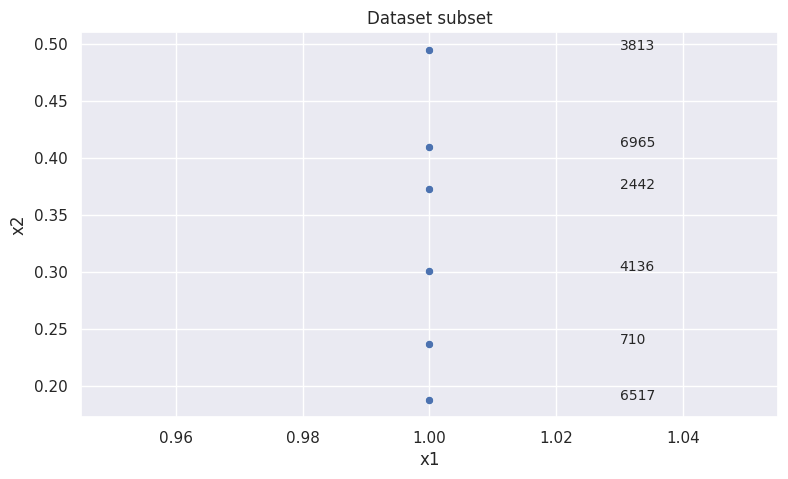

In [8]:
# Plot 'petal length (cm)' and 'petal width (cm)' with
# cluster info and point idx
sns.scatterplot(data_df_sub, x='x1', y='x2')
for idx in data_df_sub.index:
    plt.text(
        x=data_df_sub.loc[idx,'x1']+0.03,
        y=data_df_sub.loc[idx,'x2'],
        s=str(idx),
        size='small'
    )

plt.title('Dataset subset')

In [9]:
linkage_matrix = linkage(data_df_sub[numer_cols], method='ward')
linkage_matrix

array([[1.        , 5.        , 0.03748631, 2.        ],
       [0.        , 4.        , 0.04885128, 2.        ],
       [2.        , 7.        , 0.10232403, 3.        ],
       [3.        , 6.        , 0.11991647, 3.        ],
       [8.        , 9.        , 0.31897673, 6.        ]])

In [10]:
linkage_df = pd.DataFrame(linkage_matrix, columns=['First group', 'Second group', 'Distance', 'Size'])
linkage_df['New id'] = np.arange(linkage_df.shape[0]) + linkage_df.shape[0]+1

linkage_df

,First group,Second group,Distance,Size,New id
0,1.0,5.0,0.037486,2.0,6
1,0.0,4.0,0.048851,2.0,7
2,2.0,7.0,0.102324,3.0,8
3,3.0,6.0,0.119916,3.0,9
4,8.0,9.0,0.318977,6.0,10


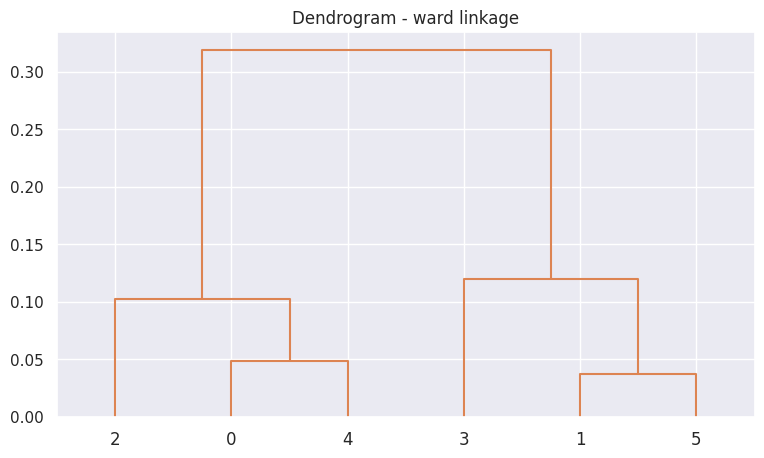

In [11]:
plt.figure()
dendrogram(linkage_matrix, color_threshold=4)
plt.title('Dendrogram - ward linkage')
plt.show()

### Cophenetic Correlation Coefficient in Hierarchical Clustering

The **cophenetic correlation coefficient** is a metric used to assess how accurately a dendrogram preserves the pairwise distances between the original data points. It is computed as the Pearson correlation coefficient between the original pairwise distances and the cophenetic distances obtained from the dendrogram.


In [12]:
cophenet(linkage_matrix, pdist(data_df_sub[numer_cols].to_numpy()))[0]

0.6990153348241972

In [13]:
def cophenetic_corr(linkage_matrix, data_mtx, distance_measure='euclidean'):

    if distance_measure != 'precomputed':
        cop_corr = cophenet(
            linkage_matrix,
            pdist(data_mtx, metric=distance_measure),
        )[0]

    else:
        cop_corr = cophenet(
            linkage_matrix,
            squareform(data_mtx),
        )[0]

    print(
        'Cophenetic correlation : {}'.format(cop_corr)
    )


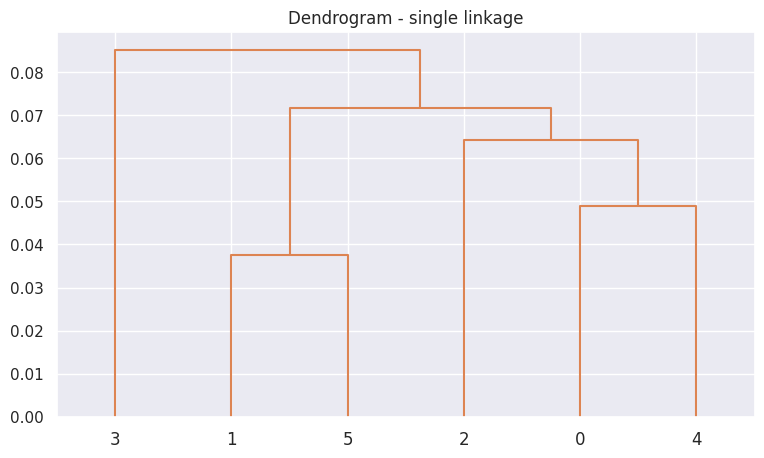

In [14]:
linkage_matrix = linkage(data_df_sub[numer_cols], method='single')

plt.figure()
dendrogram(linkage_matrix, color_threshold=4)
plt.title('Dendrogram - single linkage')
plt.show()

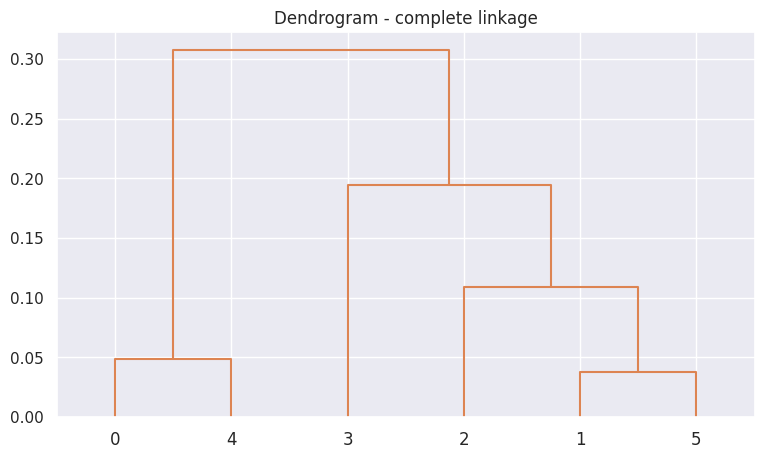

In [15]:
linkage_matrix = linkage(data_df_sub[numer_cols], method='complete')

plt.figure()
dendrogram(linkage_matrix, color_threshold=4)
plt.title('Dendrogram - complete linkage')
plt.show()

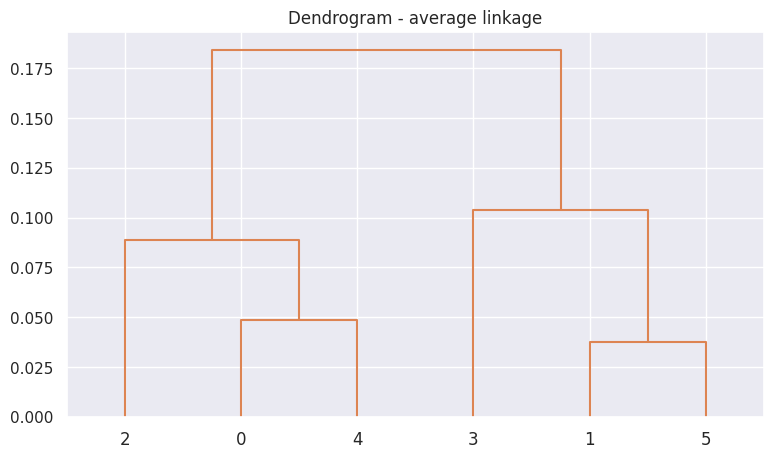

In [16]:
linkage_matrix = linkage(data_df_sub[numer_cols], method='average')

plt.figure()
dendrogram(linkage_matrix, color_threshold=4)
plt.title('Dendrogram - average linkage')
plt.show()

### Evaluation Matrix

In [41]:
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt


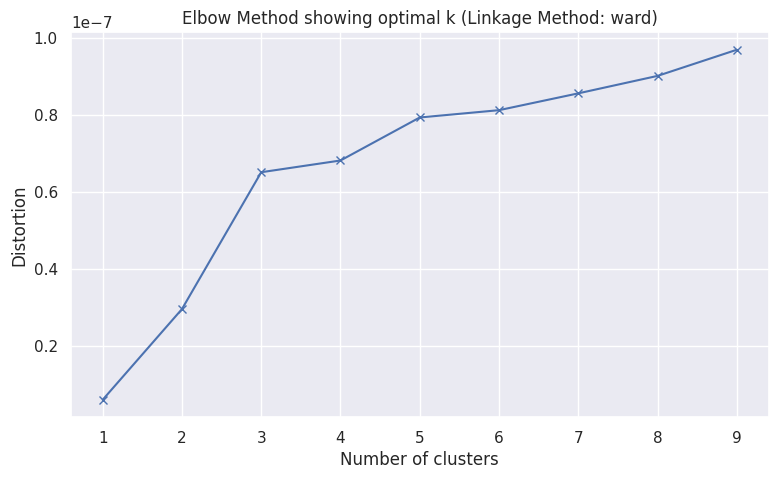

Optimal number of clusters (knee point): 1


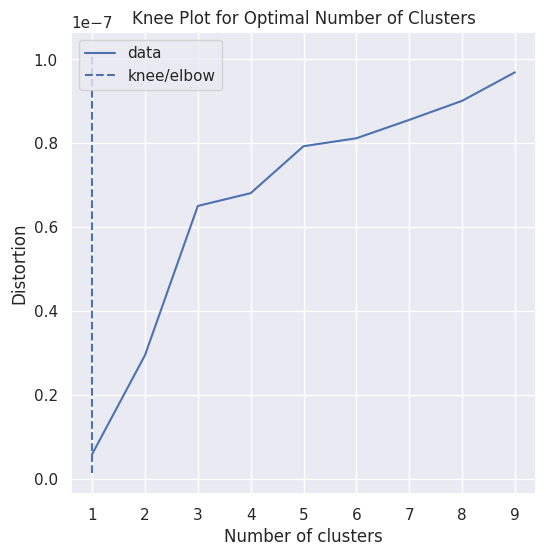

In [57]:
from scipy.cluster.hierarchy import linkage
import matplotlib.pyplot as plt
from kneed import KneeLocator

# --- Knee Point / Elbow Method (to determine optimal number of clusters) ---
def plot_elbow_method(data, linkage_method='ward'):
    distortions = []
    K = range(1, 10)

    for k in K:
        linkage_matrix = linkage(data, method=linkage_method)
        distortions.append(linkage_matrix[k-1][2])  # Distance metric for elbow

    plt.plot(K, distortions, 'bx-')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.title(f'Elbow Method showing optimal k (Linkage Method: {linkage_method})')
    plt.show()

    # Find knee point using KneeLocator
    kneedle = KneeLocator(K, distortions, curve='convex', direction='decreasing')
    print("Optimal number of clusters (knee point):", kneedle.elbow)
    kneedle.plot_knee()
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.title(f'Knee Plot for Optimal Number of Clusters')
    plt.show()

# Example usage on dataset
plot_elbow_method(data_df[numer_cols], linkage_method='ward')


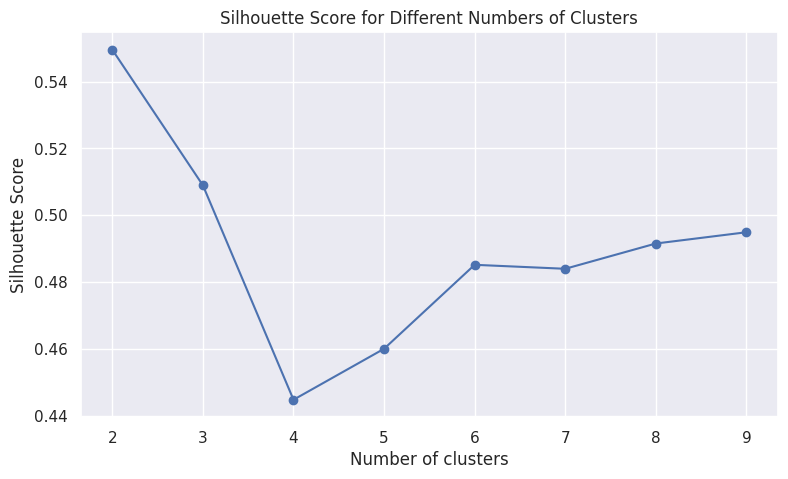

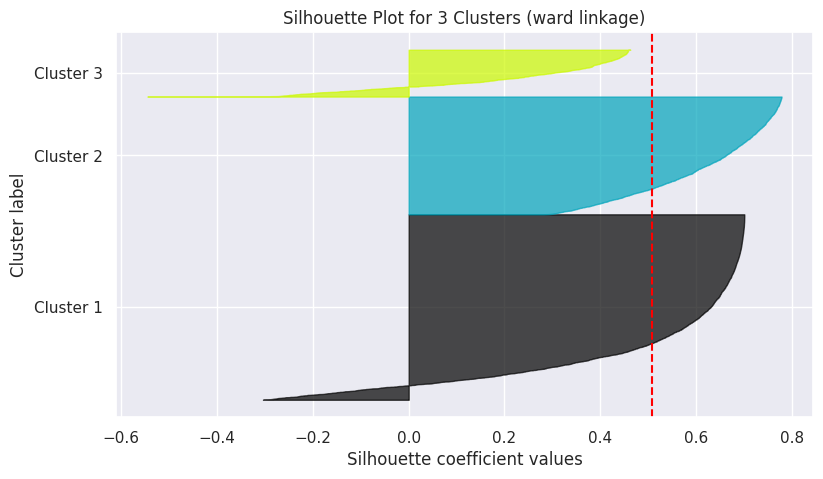

In [56]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from scipy.cluster.hierarchy import linkage, fcluster

def plot_silhouette(data, num_clusters, linkage_method='ward'):
    linkage_matrix = linkage(data, method=linkage_method)
    labels = fcluster(linkage_matrix, num_clusters, criterion='maxclust') - 1

    # Compute silhouette scores for each sample
    silhouette_vals = silhouette_samples(data, labels)
    silhouette_avg = silhouette_score(data, labels)

    y_lower, y_upper = 0, 0
    yticks = []
    for i in range(num_clusters):
        ith_cluster_silhouette_vals = silhouette_vals[labels == i]
        ith_cluster_silhouette_vals.sort()
        y_upper += len(ith_cluster_silhouette_vals)
        color = cm.nipy_spectral(float(i) / num_clusters)

        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_vals,
                          facecolor=color, edgecolor=color, alpha=0.7)
        yticks.append((y_lower + y_upper) / 2)
        y_lower = y_upper

    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    plt.title(f"Silhouette Plot for {num_clusters} Clusters ({linkage_method} linkage)")
    plt.xlabel("Silhouette coefficient values")
    plt.ylabel("Cluster label")
    plt.yticks(yticks, [f'Cluster {i+1}' for i in range(num_clusters)])
    plt.show()

# Calculate silhouette scores for different cluster numbers
num_clusters_list = range(2, 10)
silhouette_score_list = []

for n_clusters in num_clusters_list:
    linkage_matrix = linkage(data_df[numer_cols], method='ward')
    labels = fcluster(linkage_matrix, n_clusters, criterion='maxclust') - 1
    silhouette_avg = silhouette_score(data_df[numer_cols], labels)
    silhouette_score_list.append(silhouette_avg)

# Plot overall silhouette scores
plt.plot(num_clusters_list, silhouette_score_list, marker='o')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

# Example silhouette plot for 3 clusters
plot_silhouette(data_df[numer_cols], num_clusters=3, linkage_method='ward')


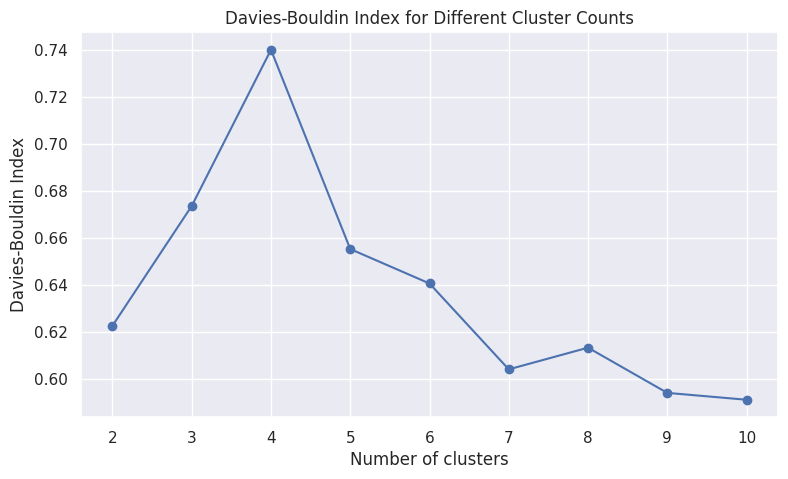

In [52]:
from sklearn.cluster import KMeans

def plot_davies_bouldin(data, max_clusters=10):
    db_scores = []
    for k in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(data)
        db_index = davies_bouldin_score(data, labels)
        db_scores.append(db_index)

    plt.plot(range(2, max_clusters + 1), db_scores, marker='o')
    plt.title("Davies-Bouldin Index for Different Cluster Counts")
    plt.xlabel("Number of clusters")
    plt.ylabel("Davies-Bouldin Index")
    plt.show()

# Example usage
plot_davies_bouldin(data_df[numer_cols], max_clusters=10)


In [59]:
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, fcluster

# Select the number of clusters you want to evaluate
num_clusters = 3  # Example: 3 clusters

# Perform hierarchical clustering
linkage_matrix = linkage(data_df[numer_cols], method='ward')
labels = fcluster(linkage_matrix, num_clusters, criterion='maxclust') - 1

# Calculate silhouette score
silhouette_avg = silhouette_score(data_df[numer_cols], labels)

# Print the silhouette score
print(f"Silhouette Score for {num_clusters} clusters: {silhouette_avg}")


Silhouette Score for 3 clusters: 0.5089445844743498


In [60]:
from sklearn.metrics import davies_bouldin_score
from sklearn.cluster import KMeans

# Select the number of clusters you want to evaluate
num_clusters = 3  # Example: 3 clusters

# Perform KMeans clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
labels = kmeans.fit_predict(data_df[numer_cols])

# Calculate Davies-Bouldin Index
db_index = davies_bouldin_score(data_df[numer_cols], labels)

# Print the Davies-Bouldin Index
print(f"Davies-Bouldin Index for {num_clusters} clusters: {db_index}")


Davies-Bouldin Index for 3 clusters: 0.6736692203979011


### Dendrograms - full dataset

In [19]:
# Load dataset from CSV
data_df = pd.read_csv('sample_data/clusteringweek06.csv')

# Define numer_cols as all columns in the dataset
numer_cols = data_df.columns.tolist()


Text(0.5, 1.0, 'Scatterplot of PCA-transformed Data')

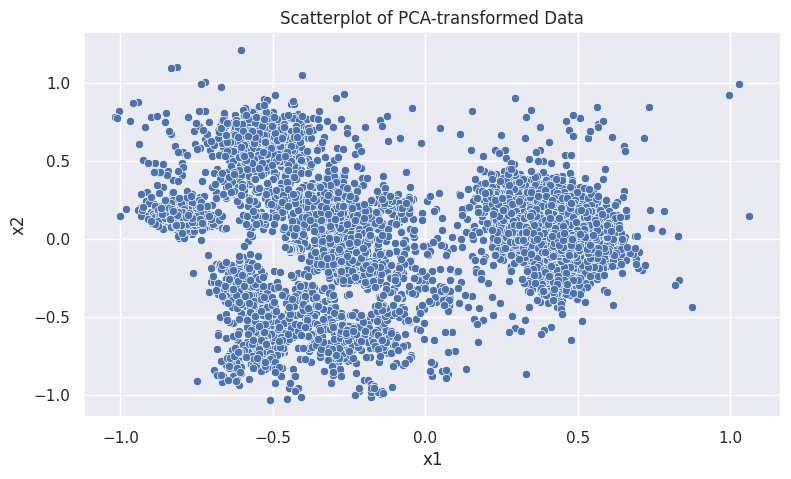

In [20]:
# Run PCA so we can show dataset in 2D space
pca = PCA(n_components=2)
pca_data = pca.fit_transform(data_df[numer_cols].values)
pca_df = pd.DataFrame(pca_data, columns=['x1', 'x2'])

# Plot and colour based on reference label
sns.scatterplot(pca_df, x='x1', y='x2')
plt.title('Scatterplot of PCA-transformed Data')

Cophenetic correlation : 0.7947622023506573


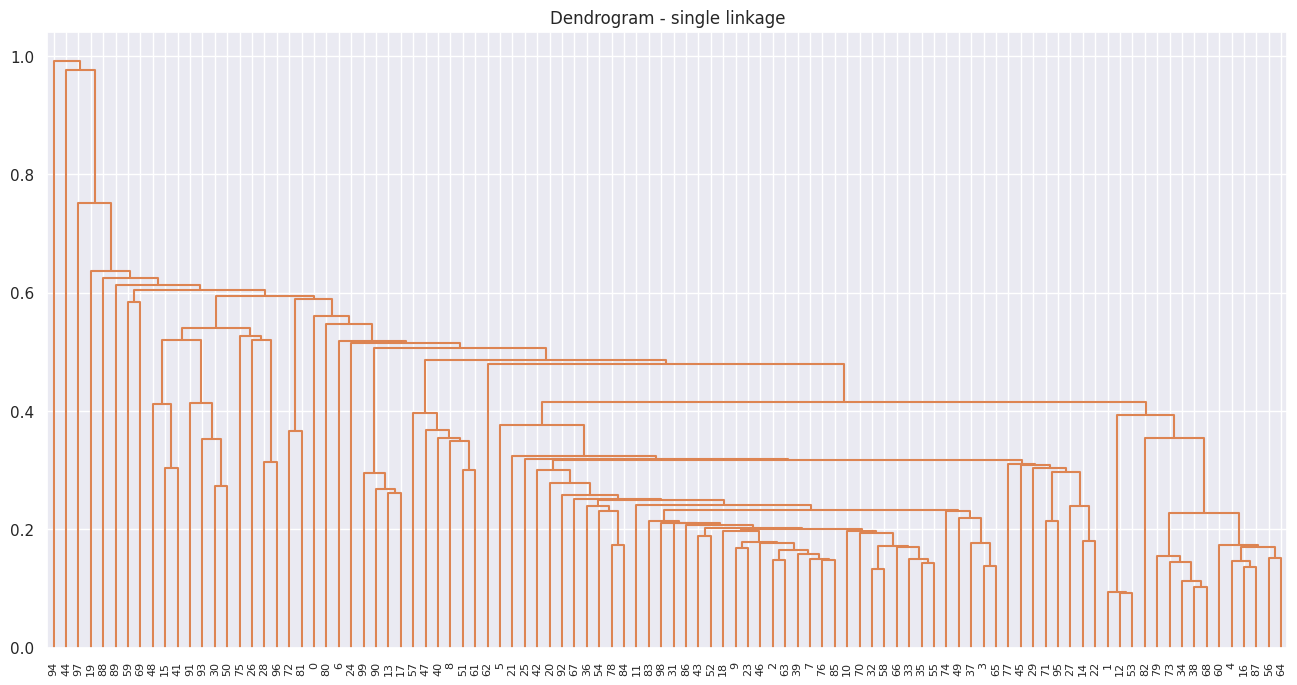

In [21]:
# Ambil sampel kecil dari data untuk mengurangi ukuran dataset
data_sample = data_df.sample(100, random_state=44)  # Ambil 100 data secara acak

# Lakukan linkage dengan sampel data
linkage_matrix = linkage(data_sample[numer_cols], method='single')

# Hitung cophenetic correlation
cophenetic_corr(linkage_matrix, data_sample[numer_cols].to_numpy())

# Plot dendrogram dengan data sampel
plt.figure(figsize=(16, 8))
dendrogram(linkage_matrix, color_threshold=1, leaf_font_size=8)
plt.title('Dendrogram - single linkage')
plt.show()


Text(0.5, 1.0, 'Scatterplot with true label')

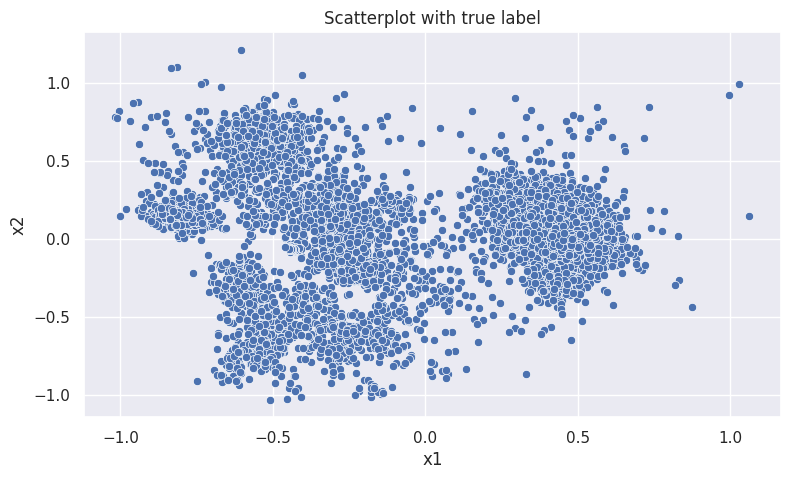

In [22]:
# Plot and colour based on reference label
sns.scatterplot(pca_df, x='x1', y='x2')
plt.title('Scatterplot with true label')

Cophenetic correlation : 0.7084468629131785


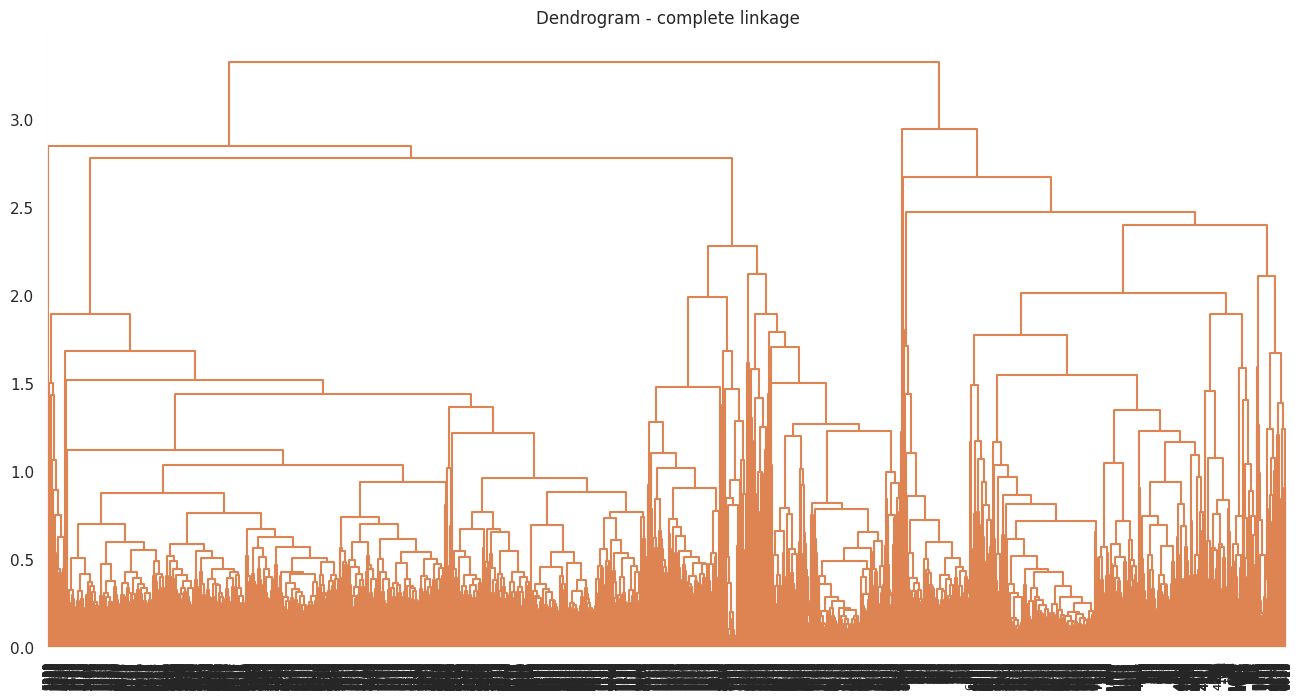

In [23]:
# Lakukan linkage dengan metode 'complete'
linkage_matrix = linkage(data_df[numer_cols], method='complete')

# Hitung cophenetic correlation
cophenetic_corr(linkage_matrix, data_df[numer_cols].to_numpy())

# Plot dendrogram tanpa label
plt.figure(figsize=(16, 8))
dendrogram(linkage_matrix, color_threshold=4, leaf_font_size=8)
plt.title('Dendrogram - complete linkage')
plt.show()


Cophenetic correlation : 0.8523050293289645


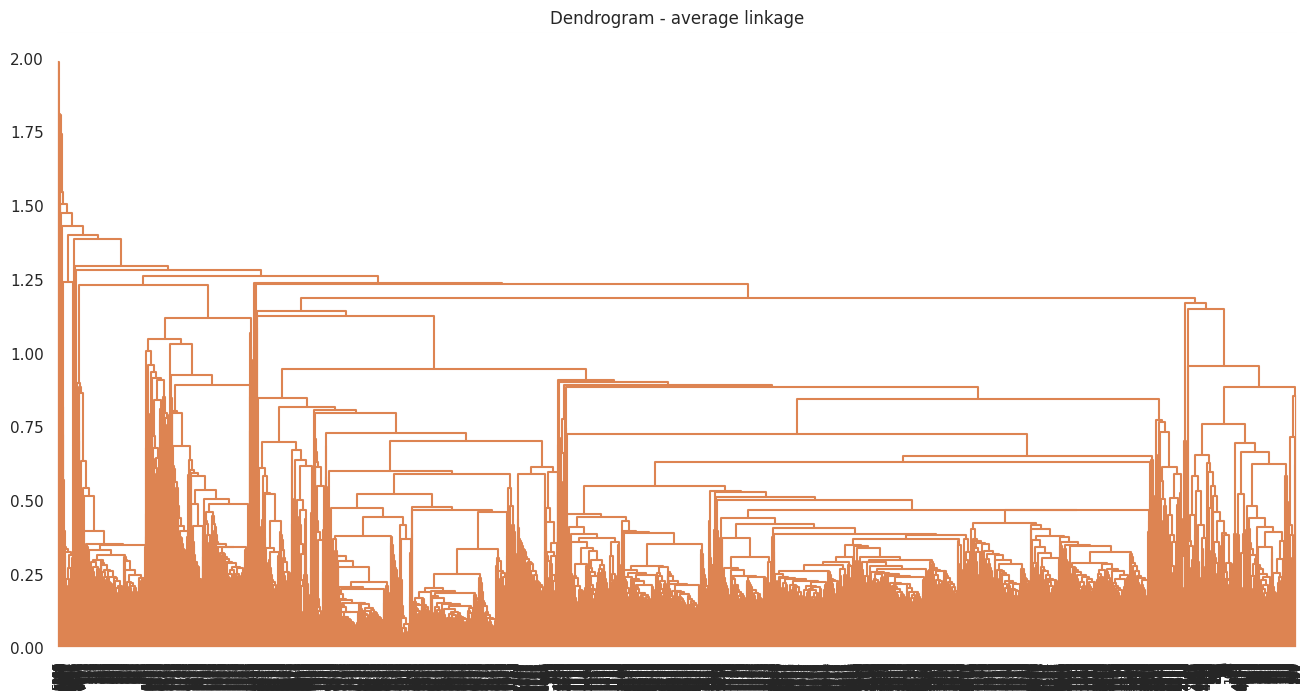

In [24]:
# Lakukan linkage dengan metode 'average'
linkage_matrix = linkage(data_df[numer_cols], method='average')

# Hitung cophenetic correlation
cophenetic_corr(linkage_matrix, data_df[numer_cols].to_numpy())

# Plot dendrogram tanpa label
plt.figure(figsize=(16, 8))
dendrogram(linkage_matrix, color_threshold=4, leaf_font_size=8)
plt.title('Dendrogram - average linkage')
plt.show()


Cophenetic correlation : 0.650604867209573


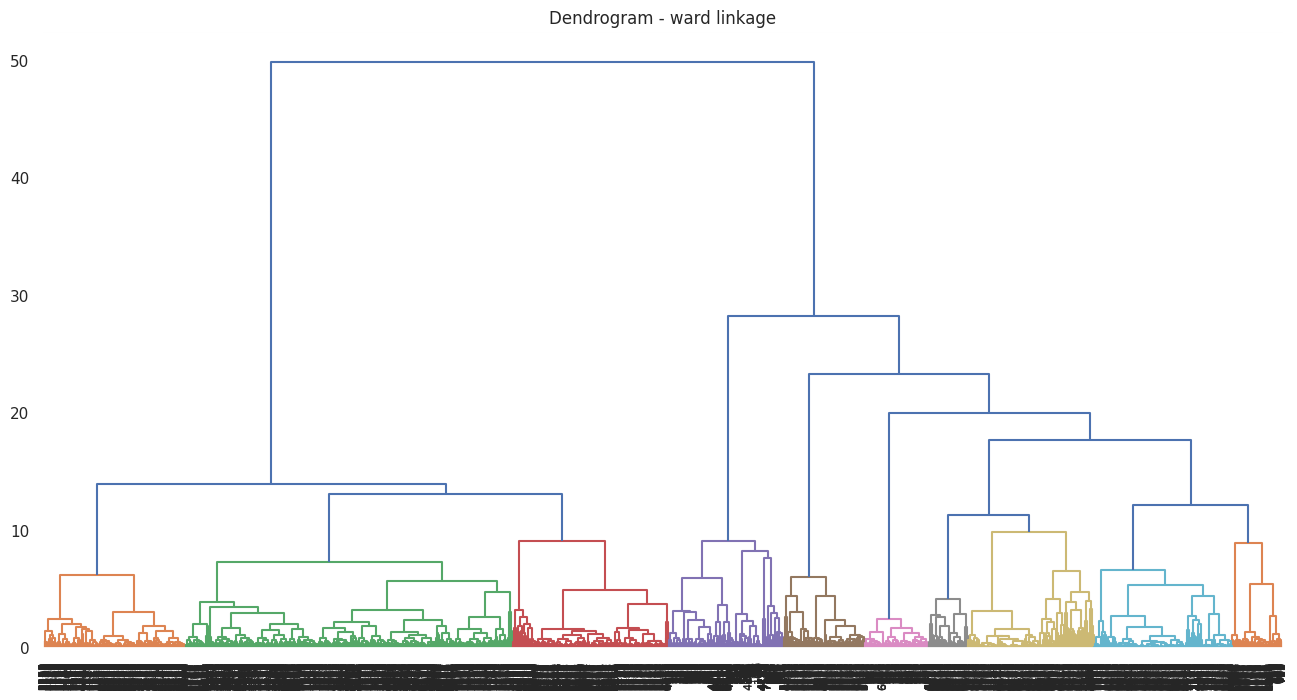

In [25]:
# Lakukan linkage dengan metode 'ward'
linkage_matrix = linkage(data_df[numer_cols], method='ward')

# Hitung cophenetic correlation
cophenetic_corr(linkage_matrix, data_df[numer_cols].to_numpy())

# Plot dendrogram tanpa label
plt.figure(figsize=(16, 8))
dendrogram(linkage_matrix, color_threshold=10, leaf_font_size=8)
plt.title('Dendrogram - ward linkage')
plt.show()


### Dendrogram truncation

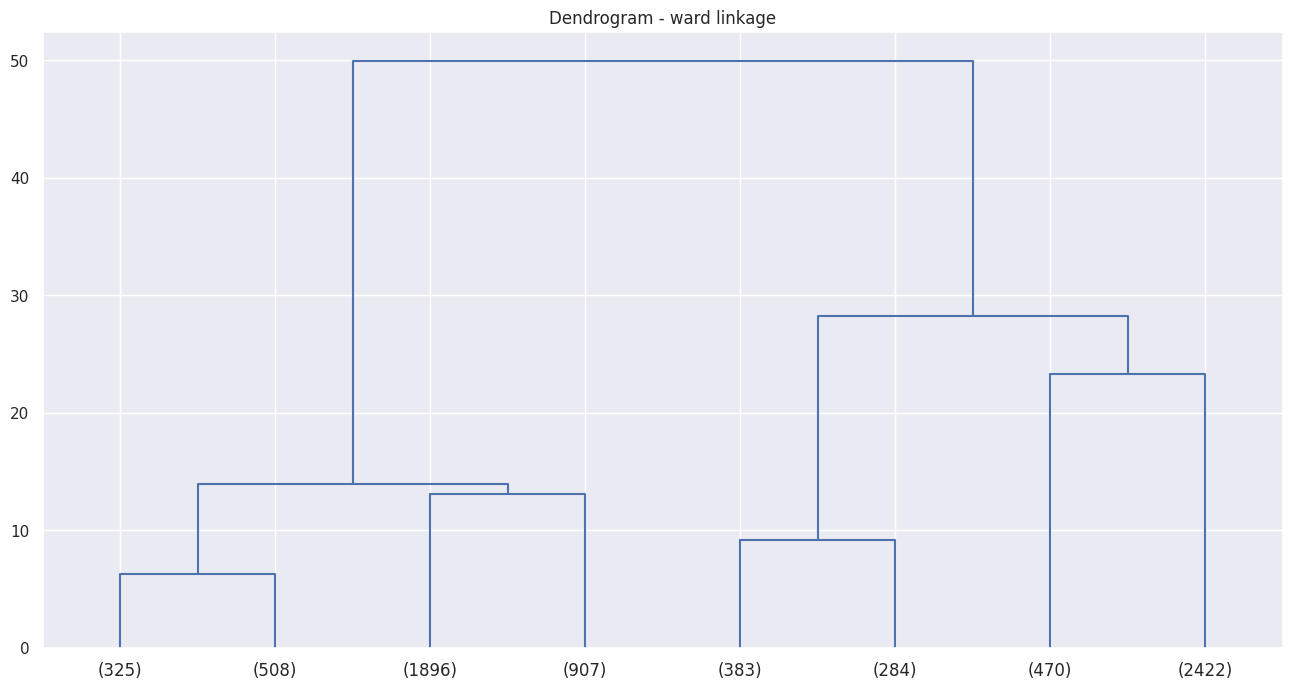

In [26]:
# Truncated dendrogram
linkage_matrix = linkage(data_df[numer_cols], method='ward')

plt.figure(figsize=(16,8))
dendrogram(linkage_matrix, color_threshold=4, truncate_mode="level", p=2)
plt.title('Dendrogram - ward linkage')
plt.show()